In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df = pd.read_csv("out/data.csv")
df['Start Time'] = pd.to_datetime(df['Start Time'])
df.head()

,ID,Start Time,Duration,Duration Milliseconds,Status,StatusCode,Error
0,GET /,2024-02-12 11:52:37+01:00,340.005834ms,340,200 OK,200,NaN
1,GET /,2024-02-12 11:52:37+01:00,342.842916ms,342,200 OK,200,NaN
2,GET /,2024-02-12 11:52:37+01:00,343.309959ms,343,200 OK,200,NaN
3,GET /,2024-02-12 11:52:37+01:00,343.321083ms,343,200 OK,200,NaN
4,GET /anything,2024-02-12 11:52:37+01:00,298.535583ms,298,200 OK,200,NaN


In [97]:
df.groupby(['ID','StatusCode']).agg({'Duration Milliseconds':['count','mean','std']})

Duration Milliseconds                        
                                         count        mean         std
ID            StatusCode                                              
GET /         200                          251  311.872510   80.630861
GET /anything 200                          251  323.585657   95.402744
PUT /anything 200                          250  324.908000  102.816108

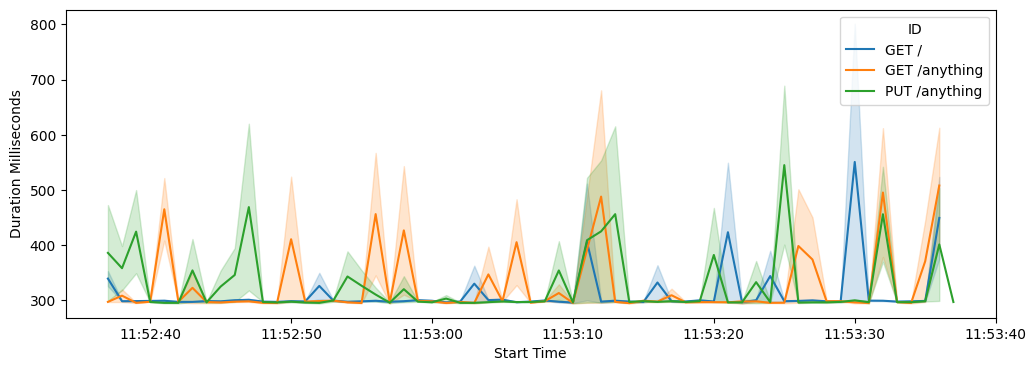

In [98]:
plt.figure(figsize=(12,4))
sns.lineplot(data=df,x='Start Time',y='Duration Milliseconds',hue="ID",errorbar='se')
plt.show()

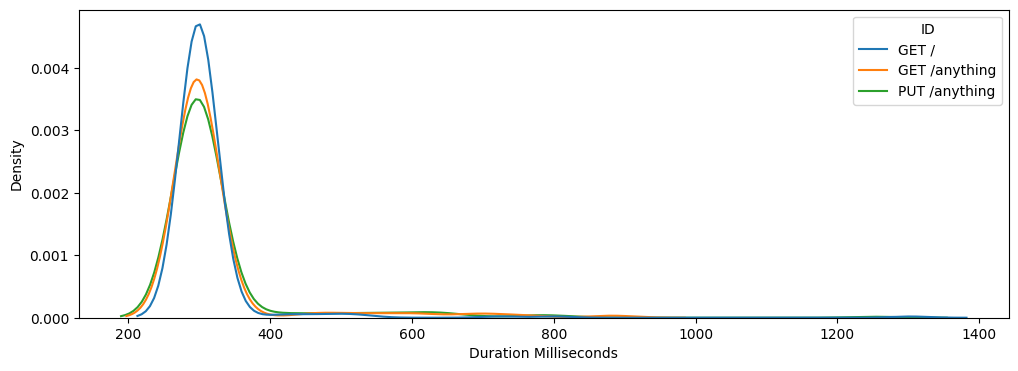

In [99]:
plt.figure(figsize=(12,4))
sns.kdeplot(data=df,x='Duration Milliseconds',hue="ID")
plt.show()